In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Loading Data-Set

In [4]:
df=pd.read_csv('LaptopData.csv')

In [5]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Exploratory Data Analysis

In [6]:
 df[df.isnull().all(axis=1)]

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.dropna(how='all',inplace=True)

In [8]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [9]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [10]:
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
df.duplicated().sum()

29

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.duplicated().sum()

0

<Axes: >

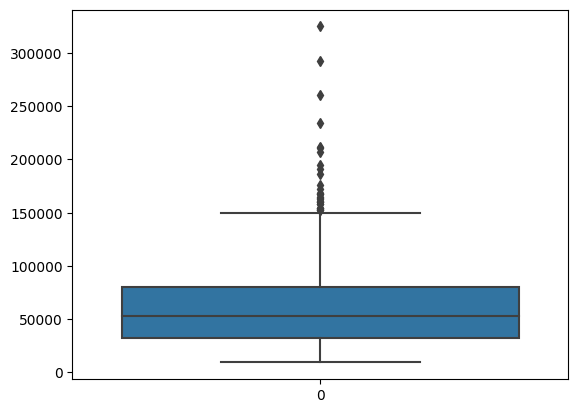

In [14]:
sns.boxplot(df['Price'])

In [15]:
z_scores=abs(zscore(df['Price']))

In [16]:
threshold=3
outliers = (z_scores > threshold)
df = df[~outliers]

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


<Axes: >

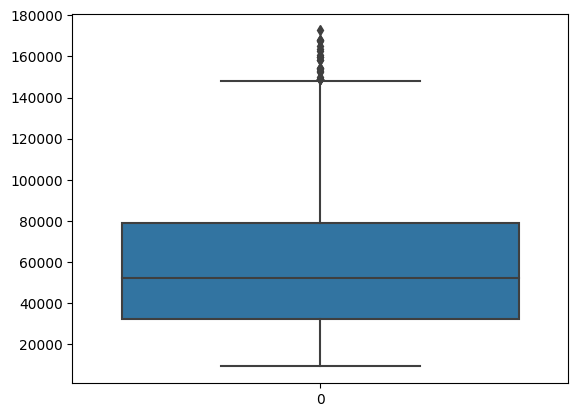

In [18]:
sns.boxplot(df['Price'])

In [19]:
df['Company'].dtype

dtype('O')

In [20]:
df['Ram'] = df['Ram'].str.replace('GB', '').astype(float)

In [21]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [22]:
df['Weight'].value_counts()

Weight
2.2kg     106
2.1kg      57
2.4kg      41
2.3kg      37
2.5kg      35
         ... 
11.1kg      1
1.14kg      1
3.8kg       1
6.2kg       1
4.0kg       1
Name: count, Length: 188, dtype: int64

In [23]:
df['Inches'] = df['Inches'].replace('?', np.nan)
df = df.dropna(subset=['Inches'])

In [24]:
columns_to_encode=['Company','TypeName','ScreenResolution','Cpu','Memory','Gpu','OpSys','Weight']

In [25]:
label_encoder = LabelEncoder()
for column in columns_to_encode:
     df[column] = label_encoder.fit_transform(df[column])

In [26]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,1,4,13.3,23,65,8.0,4,58,8,39,71378.6832
1,1,4,13.3,1,63,8.0,2,51,8,36,47895.5232
2,7,3,15.6,8,74,8.0,15,53,4,75,30636.0000
3,1,4,15.4,25,85,16.0,28,9,8,72,135195.3360
4,1,4,13.3,23,67,8.0,15,59,8,39,96095.8080


In [27]:
df['Inches']=df['Inches'].str.replace('','').astype('float')

In [28]:
df['Inches'].dtype

dtype('float64')

# Train,Test Split

In [29]:
X=df.drop('Price',axis=1)
Y=df['Price']

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [31]:
len(X_train),len(Y_train)

(985, 985)

In [32]:
len(X_test),len(Y_test)

(247, 247)

# Model Selection

In [33]:
model=RandomForestRegressor();

In [43]:
model.fit(X_train,Y_train);

In [44]:
model.score(X_test,Y_test)

0.8393777683141055

In [45]:
y_pred = model.predict(X_test)

In [46]:
mse = mean_squared_error(Y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 172479503.34386078


In [47]:
from sklearn.metrics import r2_score
r2 = r2_score(Y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.8393777683141055


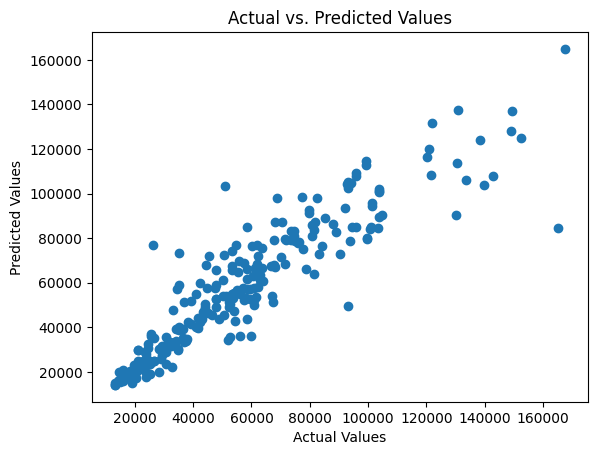

In [48]:
import matplotlib.pyplot as plt

plt.scatter(Y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.show()


In [42]:
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(model, X, Y, cv=5, scoring='neg_mean_squared_error')
avg_mse = -cross_val_scores.mean()
print(f'Average Cross-Validated MSE: {avg_mse}')


Average Cross-Validated MSE: 231156366.9108038
